# **Comprobación de la adecuación del modelo**

## **1.1 Introducción**

https://ichi.pro/es/modelo-de-regresion-lineal-multiple-con-python-aprendizaje-automatico-228751987250986

Las principales **premisas** que se han hecho hasta ahora al estudiar el análisi de regresión son las siguientes:

1. La relación entre la respuesta $y$ y los regresores es lineal, al menos en forma aproximada.
2. El término de error $\varepsilon$ tiene media cero.
3. El término de error $\varepsilon$ tiene varianza $\sigma^2$ constante.
4. Los errores no están correlacionados.
5. Los errores tienen distribución normal.

Las grandes violaciones a las premisas pueden producir un modelo inestable, en el sentido que una muestra distinta podría conducir a un modelo totalmente diferente, y obtener conclusiones opuestas. En general, no se pueden detectar desviaciones respecto a las premisas básicas examinando los estadísticos estándar de resumen, como por ejemplo los estadísticos $t,F$ o	$R^2$. Éstas son propiedades "globales" del modelo, y como tal no aseguran la adecuación del modelo.

Se tiene varios métodos de utilidad para diagnosticar violaciones de las premisas básicas de regresión.Esos métodos de diagnóstico se basan principalmente en el estudio de los **residuales** del modelo.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


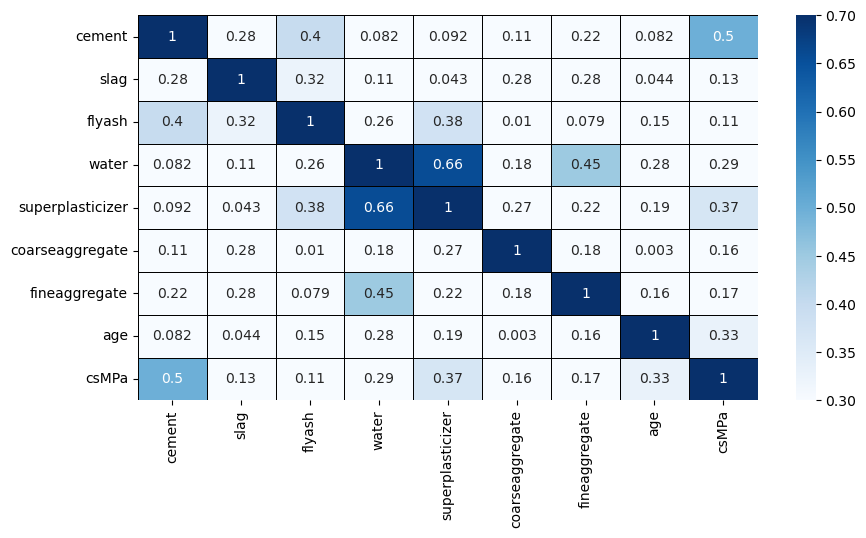

In [6]:
fig ,ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr().abs(),annot = True,vmin= 0.3,vmax =0.7,cmap = 'Blues',linewidths=0.5,linecolor='black')
plt.show()

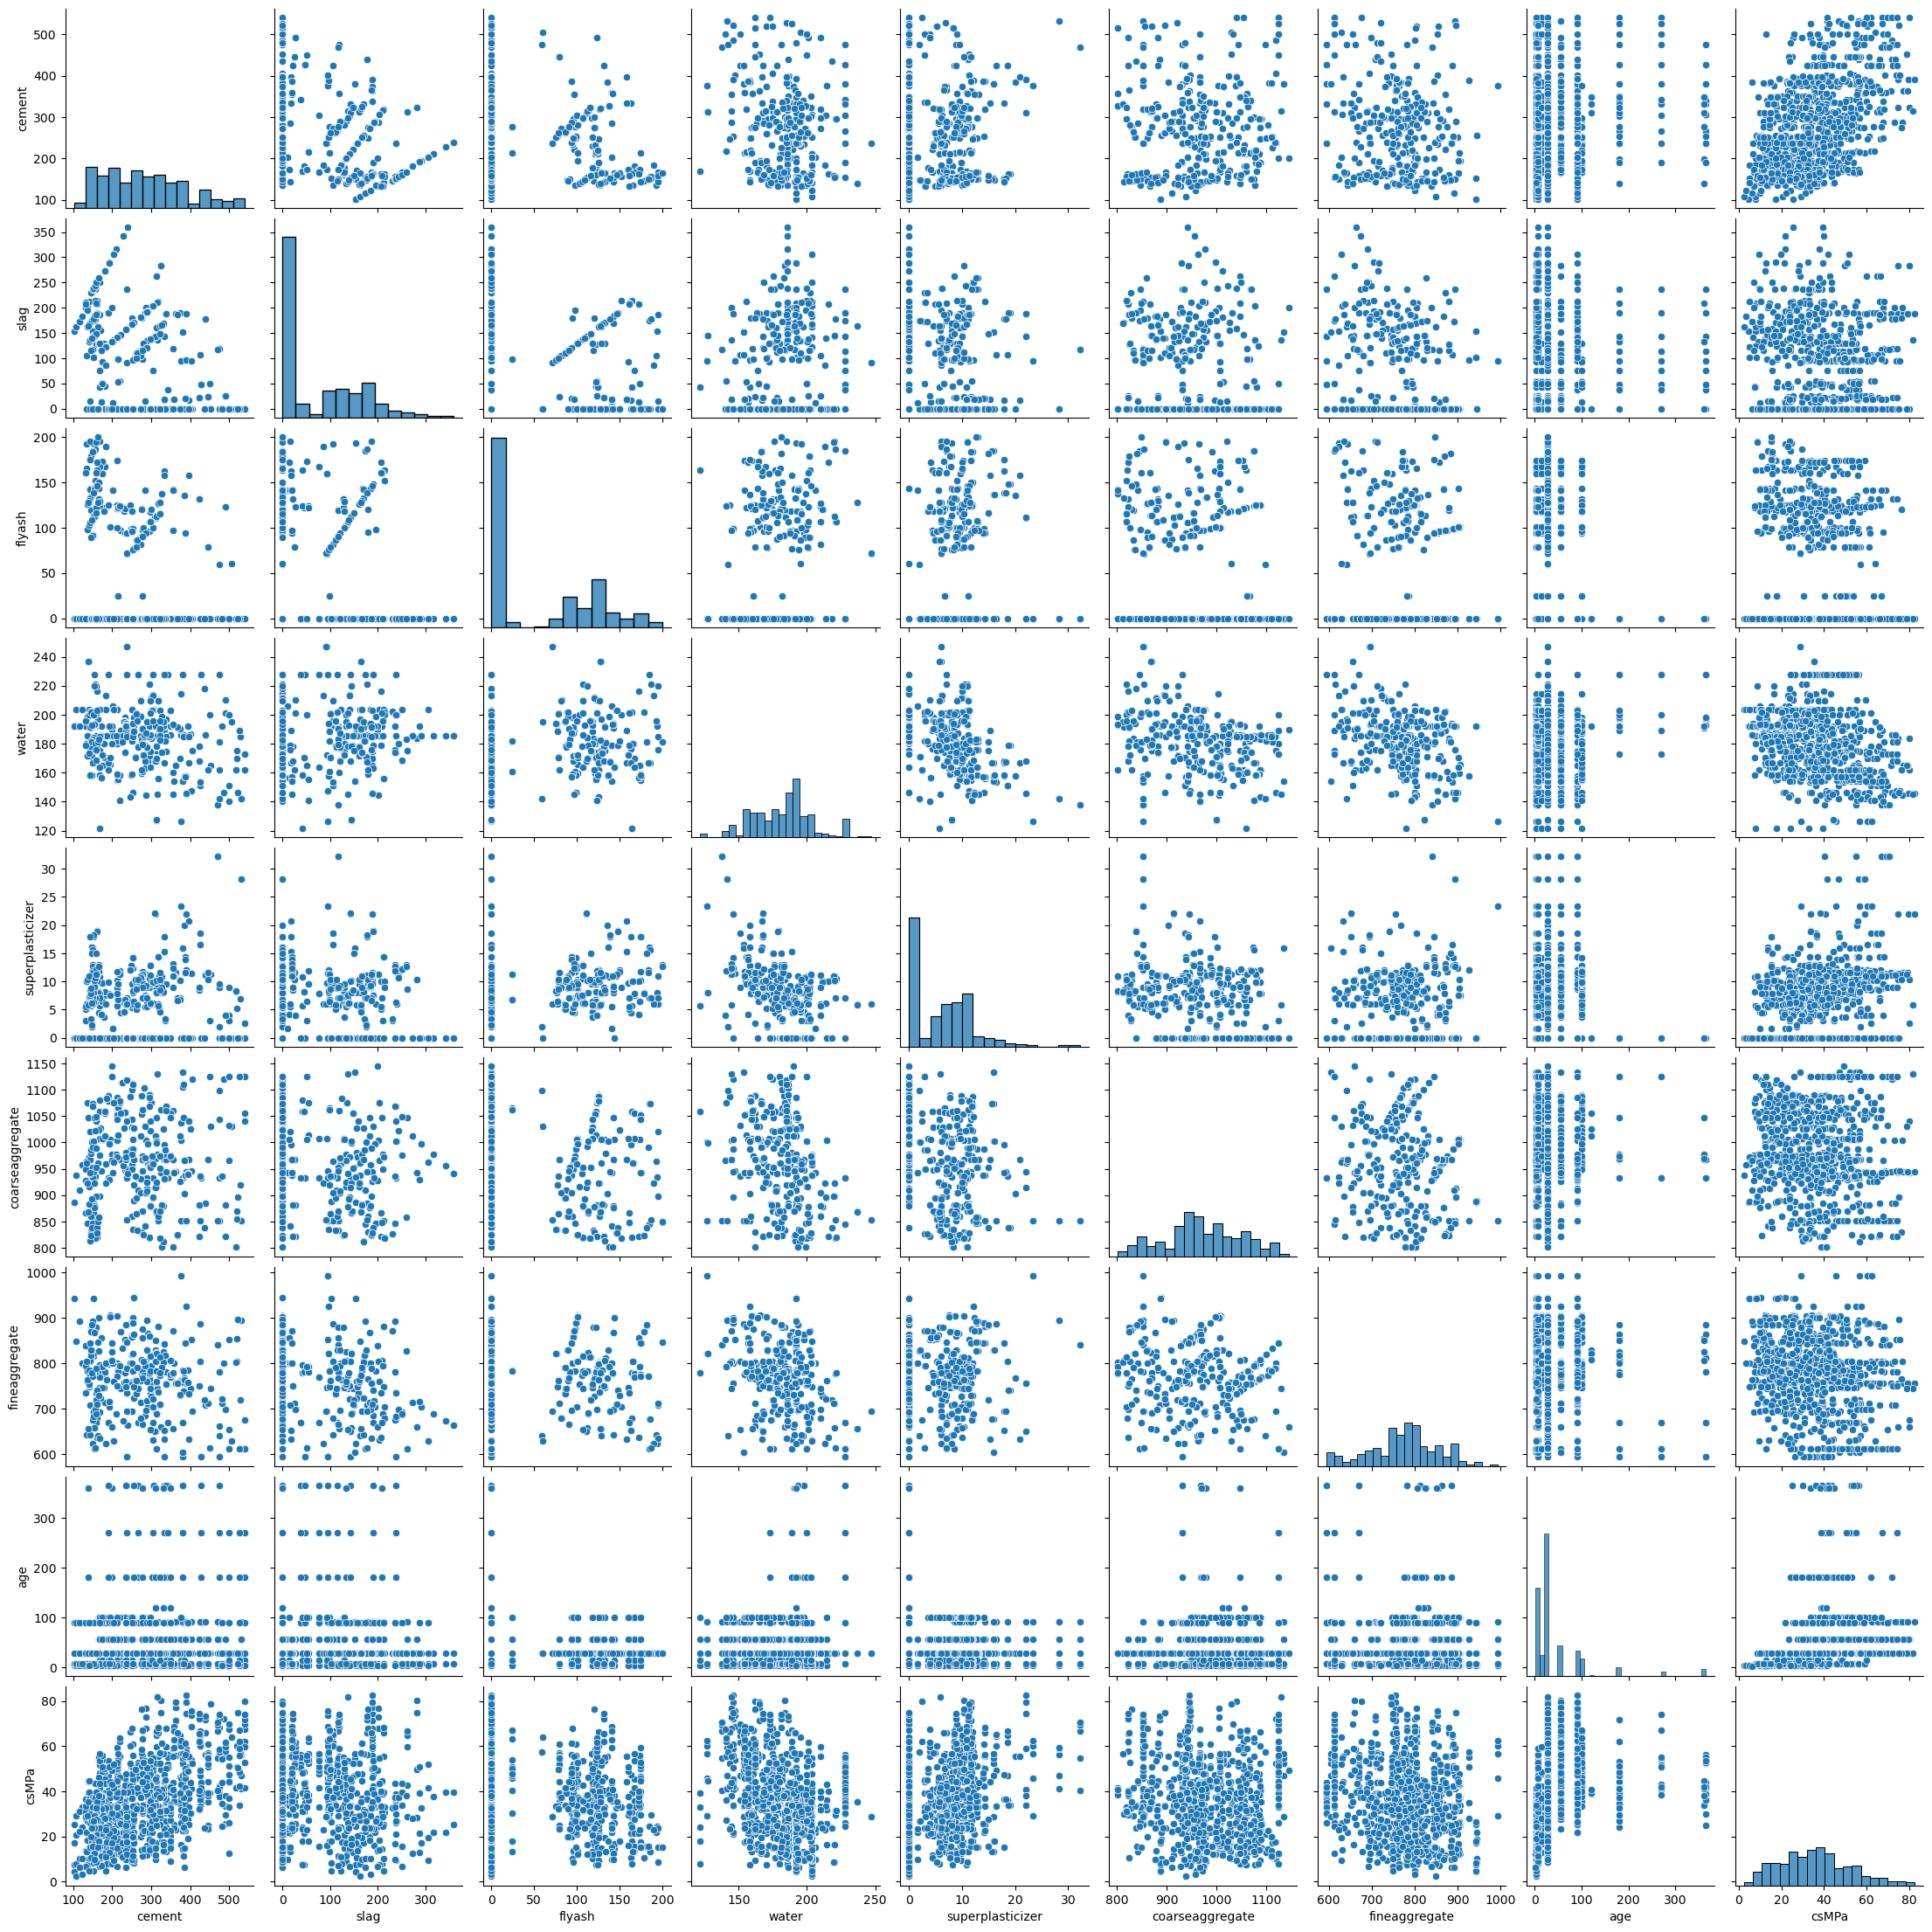

In [7]:
sns.pairplot(df)

In [8]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [9]:
X = df.drop(labels=['fineaggregate','csMPa'],axis = 'columns')
y = df['csMPa']

In [10]:
X_train ,X_test,y_train,y_test = train_test_split(X,y.values.reshape(-1,1),
                                                  train_size=0.8,
                                                  random_state=123,
                                                  shuffle=True)

In [11]:
X_train = sm.add_constant(X_train, prepend=True)
X_test = sm.add_constant(X_test, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.35e-163
Time:                        10:48:02   Log-Likelihood:                -3100.5
No. Observations:                 824   AIC:                             6217.
Df Residuals:                     816   BIC:                             6255.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.4938     10.064  

In [12]:
y_pred_train = modelo.predict(exog=X_train).values.reshape(-1)
y_pred_train[:5]

array([27.87183459, 38.34164489, 39.79678619, 20.96726264, 28.90574764])

In [13]:
y_train = y_train.reshape(-1)
y_train[:5]

array([15.69, 35.86, 44.14, 13.36, 26.14])

## **1.2 Análisis de residuales**

### **1.2.1 Definición de residuales**

Se halla de la siguiente forma:

$$e_i = y_i - \hat{y}_i, i = 1,2,...,n \tag{1.1}$$

siendo $y_i$ una observación, y $\hat{y}_i$ su valor ajustado correspondiente.Como se puede considerar que un residual es la **desviación** entre los **datos** y el **ajuste**, también es *una medida de la variabilidad de la variable de repsuesta que no explica el modelo de regresión*. Como se verá, una forma muy efectiva de investigar lo bien que se ajusta el modelo a los datos, y comprobar las premisas es **graficar los residuales**.

Los residuales tienen varias propiedades importantes. Tienen media cero, y su varianza promedio aproximanda se estima con :

$$\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-p} = \frac{\sum_{i=1}^n {e_i^2}}{n-p} = \frac{SS_{Res}}{n-p} = MS_{Res}$$

donde $n$ numero de observaciones y $p$ la cantidad de parámetros.

In [14]:
residuo_train = y_train - y_pred_train
residuo_train[:5]

array([-12.18183459,  -2.48164489,   4.34321381,  -7.60726264,
        -2.76574764])

In [15]:
X_train.shape

(824, 8)

In [16]:
MS_res = np.sum((y_train - y_pred_train)**2)/(len(y_train) - X_train.shape[1])
MS_res

109.66742728702522

#### **1.2.2 Métodos para escalar residuales**

A veces es mejor trabajar con **residuales escalados**. Los residuales escalados son útiles para determinar observaciones que sean **atípicas** o **valores extremos**, esto es, observaciones que en algún aspecto estén separadas del resto de los datos.

* *Residuales estandarizados*

Ya que la varianza aproximada de un residual se estima con $MS_{Res}$, el cuadrado medio de los residuales, un escalamiento lógico de los residuales sería el de los **residuales estandarizados**

$$d_i = \frac{e_i}{\sqrt{{MS}_{Res}}} , i = 1,2,...,n \tag{1.2}$$

Los residuales estandarizados tiene media cero y varianza aproximadamente unitaria, en consecuencia, un resdiual estandarizado grande $(d_i > 3)$ indica que se trata de un valor atípico potencial.

In [17]:
residual_estandarizado = residuo_train/(np.sqrt(MS_res))
residual_estandarizado[:5]

array([-1.16325217, -0.23697406,  0.41473662, -0.72642299, -0.26410324])

* *Residuales estudentizados*

Si se usa el $MS_{Res}$ como la varianza del $i-ésimo$ residual $e_i$ sólo se tendra un aproximación.Se puede mejorar el escalamiento de residuales dividendo $e_i$ entre la desviación estándar exacta del $i-ésimo$ residual.

$$e = (I - H) y \tag{1.3}$$

en donde $H = X(X'X)^{-1}$ es la **matriz de sombrero**. 

In [18]:
H = np.dot(np.dot(X_train.values,np.linalg.inv((np.dot(X_train.values.T,X_train.values)))),X_train.values.T)
H # matriz de sombrero

array([[ 0.00566069, -0.00159252, -0.0008658 , ...,  0.00042507,
        -0.00037419,  0.00264311],
       [-0.00159252,  0.00397249,  0.00383225, ...,  0.00304247,
         0.0034882 ,  0.00068155],
       [-0.0008658 ,  0.00383225,  0.00662884, ...,  0.00259515,
         0.00292633,  0.00035462],
       ...,
       [ 0.00042507,  0.00304247,  0.00259515, ...,  0.01553235,
         0.01214603,  0.0080595 ],
       [-0.00037419,  0.0034882 ,  0.00292633, ...,  0.01214603,
         0.01069002,  0.00617   ],
       [ 0.00264311,  0.00068155,  0.00035462, ...,  0.0080595 ,
         0.00617   ,  0.00618543]])

In [19]:
H.shape

(824, 824)

Es **simétrica** $(H' = H)$ y es **idempotente** $(H^2 = H)$. De forma parecida, la matriz $I-H$ es simétrica e idempotente.Si se sustituye $y=X\beta +\varepsilon$ en la ecuación $(1.3)$ se obtiene

$$e = (I-H)(X\beta + \varepsilon) = X\beta - HX\beta + (I-H)\varepsilon$$

$$= X\beta - X(X'X)^{-1} X'X\beta + (I-H)\varepsilon = (I-H)\varepsilon \tag{1.4}$$

La matriz de covarianza de los residuales es 

$$Var(e) = Var[(I-H)\varepsilon] = (I-H)Var(\varepsilon)(I-H)' = \sigma^2(I-H) \tag{1.5}$$

porque $Var(\varepsilon) = \sigma^2I$ , e $I-H$ es simétrica e idempotente.En general, la matriz $I-H$ no es diagonal, por lo que los residuales tienen distintas varianzas, y están corrleacionados.
La varianza del $i-ésimo residual es

$$Var(e_i) = \sigma^2(1-h_{ii}) \tag{1.6}$$

en donde $h_{ii}$ es el $i-ésimo$ elemento de la diagonal de la matriz de sombrero $H$.La covarianza entre los residuales $e_i$ y $e_j$ es

$$Cov(e_i,e_j) = - \sigma^2 h_{ij} \tag{1.7}$$

Ahora bien, ya que $0 \leq h_{ii} \leq 1$, si se usa el cuadrado medio de los residuales, $MS_{Res}$, para estimar la varianza de los residuales.

Entonces, los **residuales estudentizados**

$$r_i = \frac{e_i}{\sqrt{MS_{Res}(1- h_{ii})}}, i = 1,2,...,n \tag{1.8}$$

En muchos casos, la varianza de los residuales se estabiliza, en especial para conjuntos grandes de datos.En esos casos podrá haber poca diferencia entre los residuales estandarizados y los estudentizados.*Sin embargo, ya que cualquier punto con un residual grande y también una $h_{ii}$ grande tiene una influencia potencial muy grande sobre el ajuste por mínimos cuadrados, se recomienda por lo general examinar los residuales estudentizados*.



In [20]:
h_ii = np.diag(H)
h_ii[:5]

array([0.00566069, 0.00397249, 0.00662884, 0.00669062, 0.00429164])

In [21]:
residual_estudentizado = residuo_train/(np.sqrt(MS_res*(1-h_ii)))
residual_estudentizado[:5]

array([-1.16655861, -0.23744616,  0.4161181 , -0.72886537, -0.26467178])

* *Residuales PRESS*

Los residuales estandarizados y los estudentizados son efectivos para detectar valores atípicos. Otro método para hacer que los residuales sean útiles en la determinación de valores atípicos consiste en examinar la cantidad que se calcula partiendo de $y_i - \hat{y}_i$, siendo $\hat{y}_{(i)}$ el valor ajustado de la $i-ésima$ respuesta, basado en todas las observaciones excepto esa $i-ésima$.

Sucede que el $i-$ ésimo residual PRESS es

$$e_{(i)} = \frac{e_i}{1-h_{ii}} , i = 1,2,...,n \tag{1.11}$$

In [22]:
residual_press = residuo_train/(1-h_ii)
residual_press[:5]

array([-12.25118471,  -2.49154253,   4.3721964 ,  -7.65850275,
        -2.77766838])

### **1.2.3 Gráficas de residuales**

El análisis gráfico de los residuales es una forma muy efectiva de investigar la adecuación del ajuste de un modelo de regresión.

* *Gráfica de probabilidad normal*

Un método muy sencillo de comprobar la suposición de normalidad es trazar una gráfica de **probabilidad normal** de los residuales.Sean $e_{[1]} < e_{[2]} < \cdots < e_{[n]}$ los residuales ordenados en orden creciente.Si se grafican $e_[i]$ en función de la probabilidad acumulada $P_i = (i-\frac{1}{2})/n , i = 0 ,1,2,...,n$, en papel de probabilidad normal,los puntos que resulten deberían estar aproximadamente sobre una línea recta.

In [23]:
p_i = (np.arange(start=0,stop = len(X_train),step=1) - 0.5)/len(X_train)
p_i[:10]

array([-0.0006068 ,  0.0006068 ,  0.00182039,  0.00303398,  0.00424757,
        0.00546117,  0.00667476,  0.00788835,  0.00910194,  0.01031553])

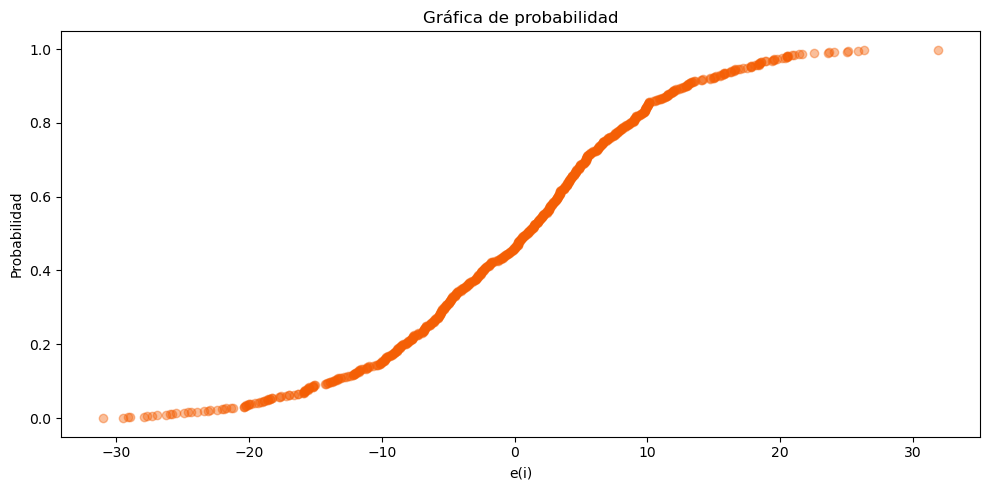

In [64]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(sorted(residuo_train),p_i,marker='o',alpha = 0.4,color = '#F45F05')
ax.set_title('Gráfica de probabilidad',fontsize = 12)
ax.set_xlabel('e(i)')
ax.set_ylabel('Probabilidad')
plt.tight_layout()
plt.show()

De acuerdo a la grafica de probabilidad normal, se tiene una distribución con colas delgadas.

* *Gráfica de residuales en función de los valores ajustados* $\hat{y}_i$

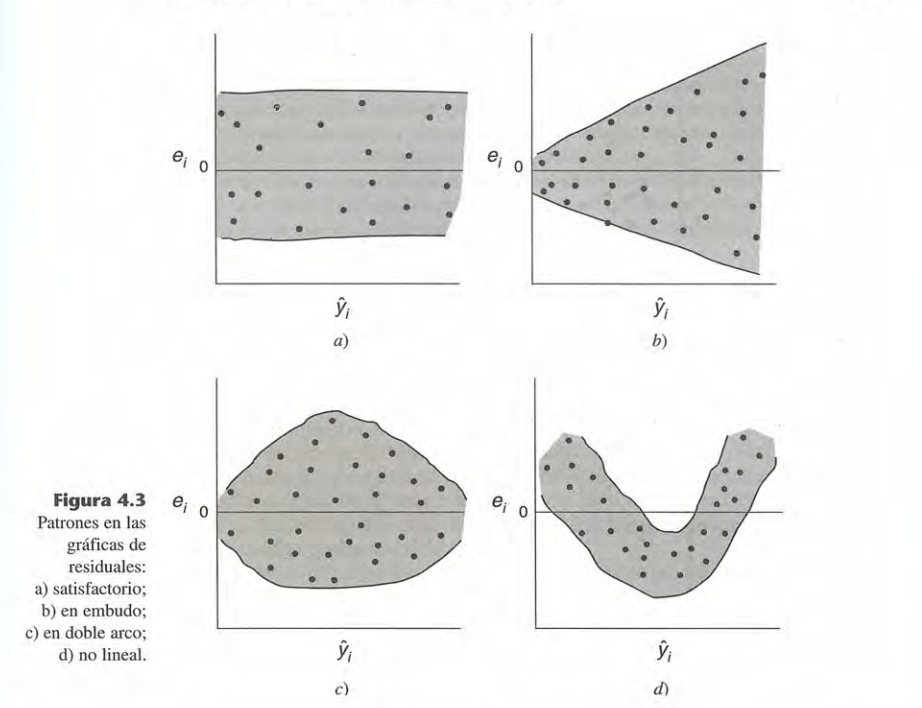

Es útil una grafica de los residuales $e_i$ (o los residuales escalados $d-i,r_i$ o $t_i$) en función de los valores ajustados correspondientes $\hat{y}_i$, para detectar algunos tipos frecuentes de inadecuaciones del modelo. Si la grafica se parece a la de la figura $4.3a$, que indica que los residuales se pueden encerrar en una banda horizontal, entonces no hay defectos obvios del modelo. Las gráficas de $e_i$ en función de $\hat{y}_i$ que se parezcan a cualquier de los patrones de las partes *b* a *d* son síntomas de deficiencias del modelo.

*Se deben graficar los residuales en función de los valores ajustados* $\hat{y}_i$, *y no los valores observados* $y_i$, *porque las* $e_i$ *y las* $\hat{y}_i$ *no están correlacionadas, mientras que las* $e_i$ *y las* $y_i$ *suelen estar correlacionadas*.

Las distribuciones en las partes $b$ y $c$ indican que la varianza de los errores no es constante. La **figura de embudo abierto hacia afuera** en la parte $b$ implica que la varianza es función creciente de $y$.

El método común para manejar la no constancia de la varianza es aplicar una **transformación** adecuada ya  sea a la variable regresora o a la de respuesta, o usar el metodo de minimos cuadrados ponderados.

Una grafica en curva, como la de la parte $d$, indica **no linealidad**. Esto podría indicar que se necesitan otras variables regresoras en el modelo.

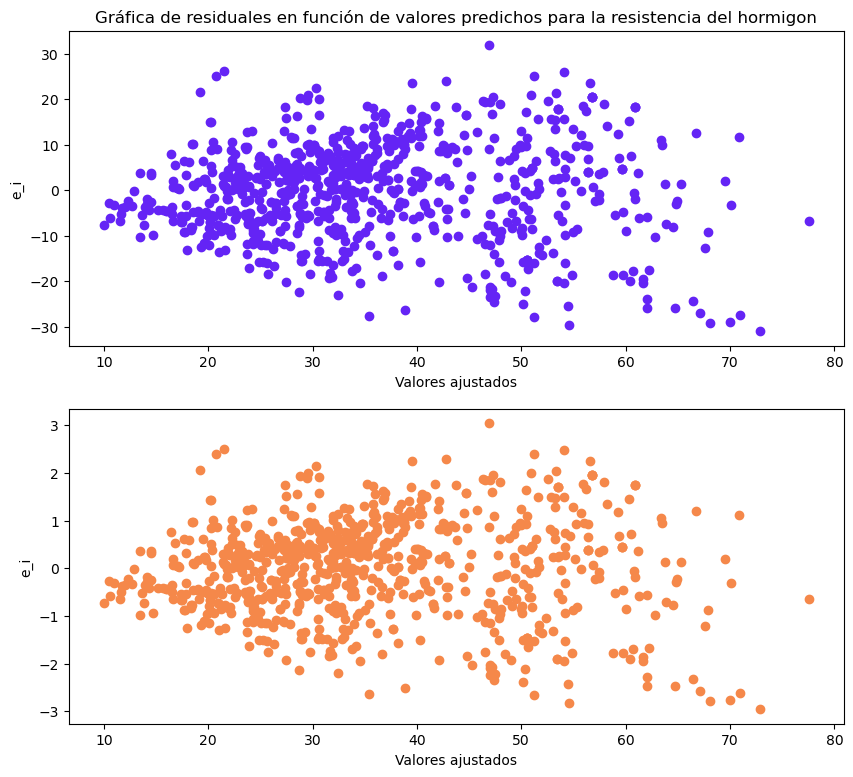

In [75]:
fig , ax = plt.subplots (nrows = 2, ncols = 1, figsize = (10,9))
ax[0].scatter(modelo.predict(X_train),residuo_train,color = '#6424F5')
ax[0].set_title('Gráfica de residuales en función de valores predichos para la resistencia del hormigon')
ax[0].set_xlabel('Valores ajustados')
ax[0].set_ylabel('e_i')

ax[1].scatter(modelo.predict(X_train),residual_estandarizado,color ='#F5884A')
ax[1].set_xlabel('Valores ajustados')
ax[1].set_ylabel('e_i')
plt.show()

* *Gráfica de residuales en función del regresor*

También puede ayudar el graficar los residuales en función de los valores correspondientes de cada variable regresora. Estás gráficas suelen presentar patrones como los de la figura $4.3$, excepto que la escala horizontal es $x_{ij}$ para el $j$-ésimo regresor, y no es $\hat{y}_i$. Una vez más, es deseable la impresión de una banda horizontal que contiene a los residuales.

In [81]:
X_train.columns.values[1:]

array(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'age'], dtype=object)

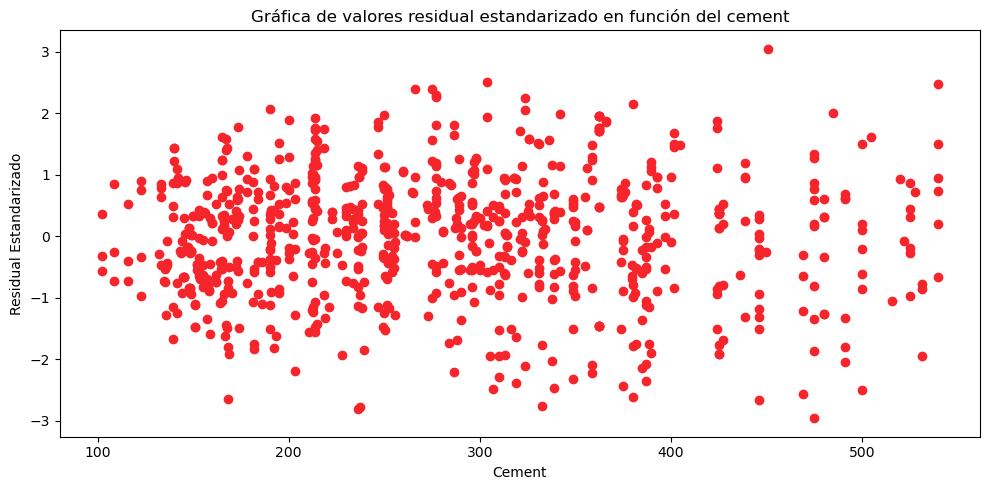

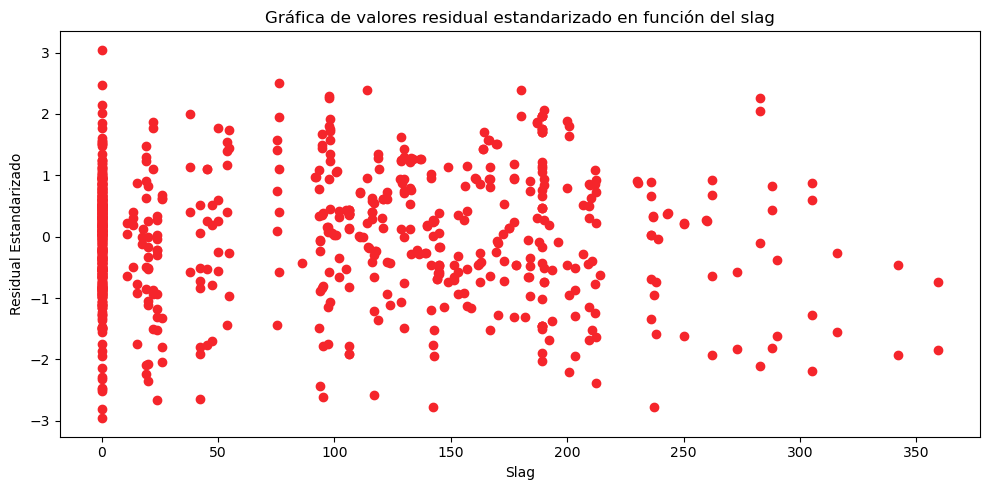

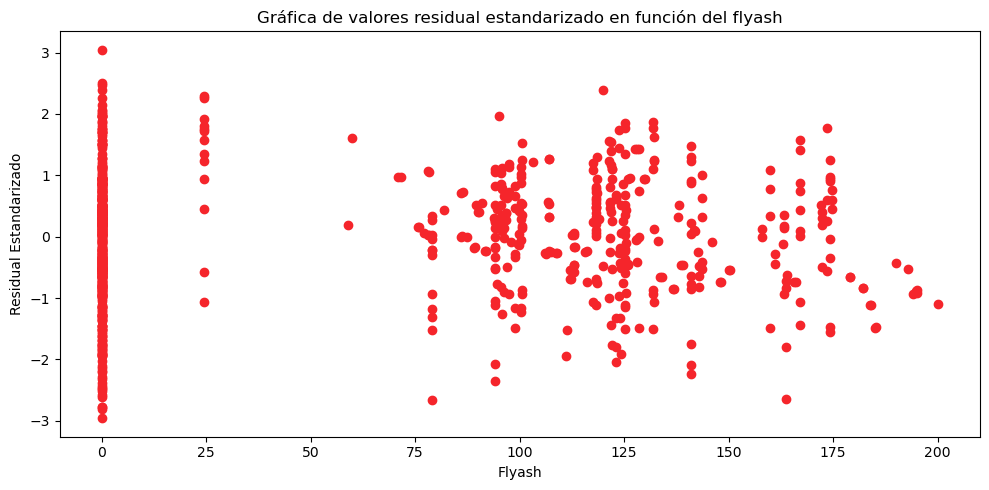

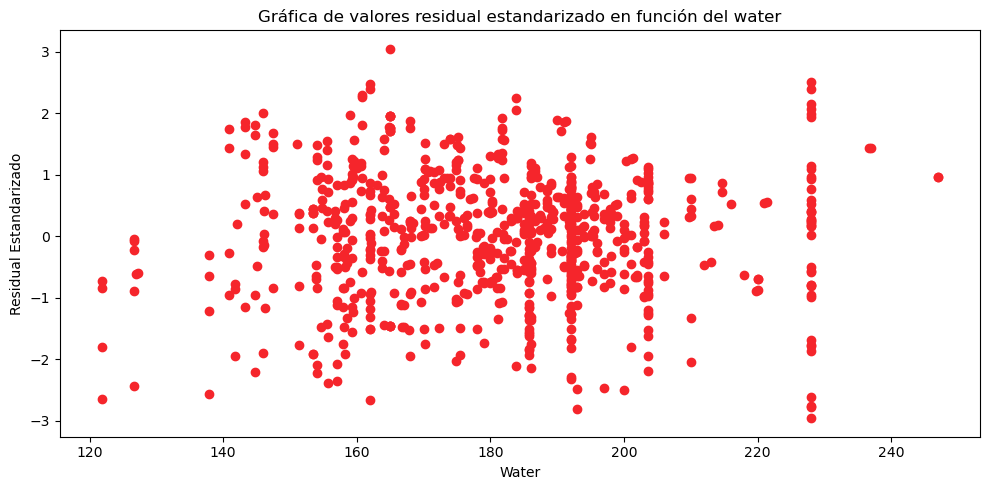

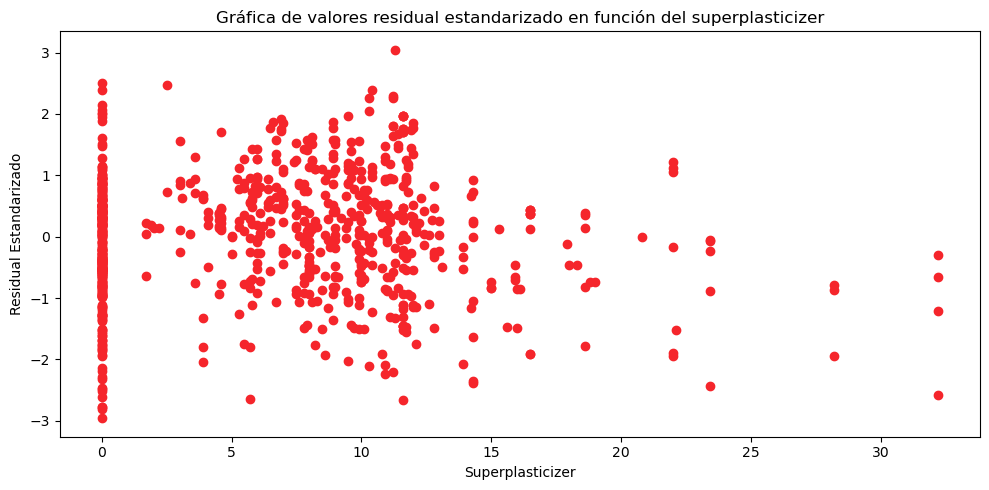

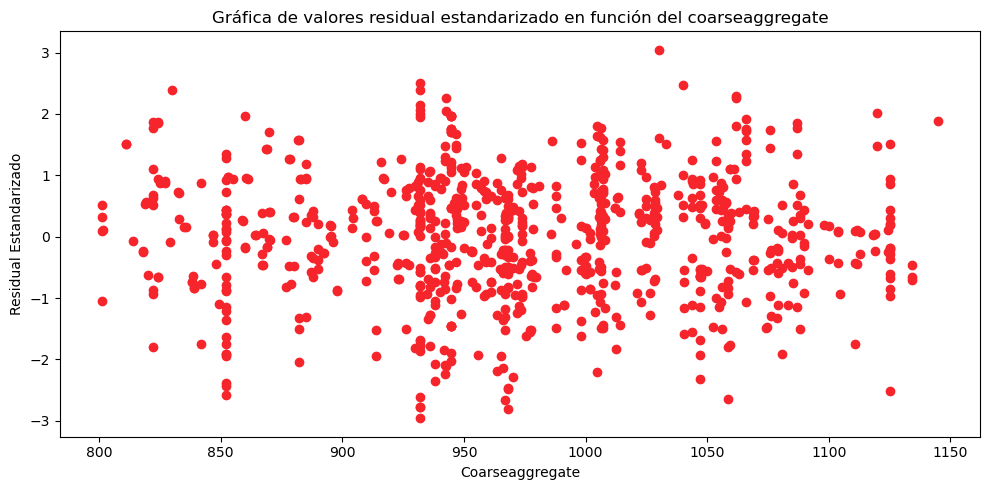

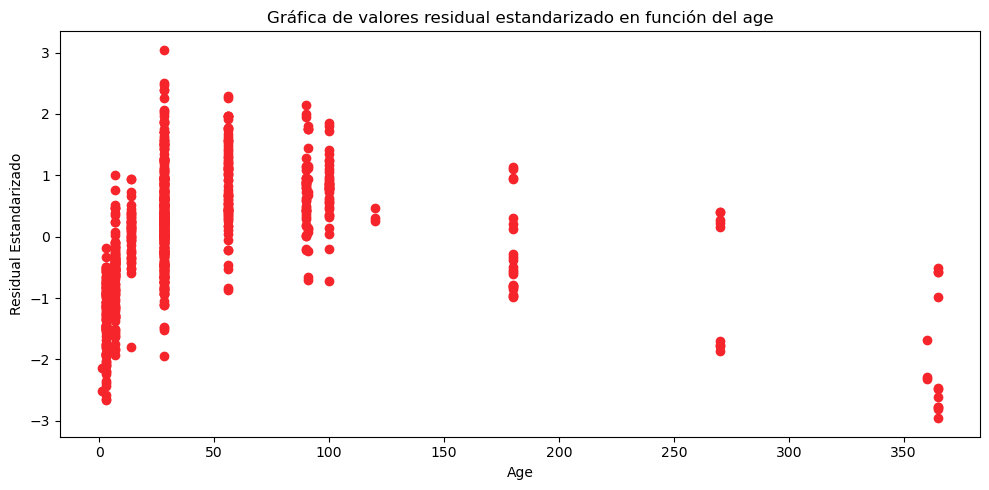

In [97]:
for regresora in X_train.columns.values[1:]:
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(X_train[regresora],residual_estandarizado,color ='#F5252B')
    ax.set_title('Gráfica de valores residual estandarizado en función del '+ str(regresora))
    ax.set_xlabel(regresora.title())
    ax.set_ylabel('Residual Estandarizado')
    plt.tight_layout()
    plt.show()


* *Gráfica de residuales en el tiempo*

### **1.2.4 Gráficas de regresión parcial y de residuales parciales**

## **1.3 La estadística PRESS**

## **1.4 Detección y tratamiento de puntos atípicos**

## **1.5 Falta de ajuste del modelo de regresión**

* *Supuesto 1: Linealidad de la Relación*

Existe una relación lineal entre las variables predictoras y la variable de respuesta. Verifique este supuesto generando un gráfico de residuos que muestre los valores ajustados frente a los valores residuales de un modelo de regresión.  Lo que queremos ver es una nube de puntos que no tiene relación.

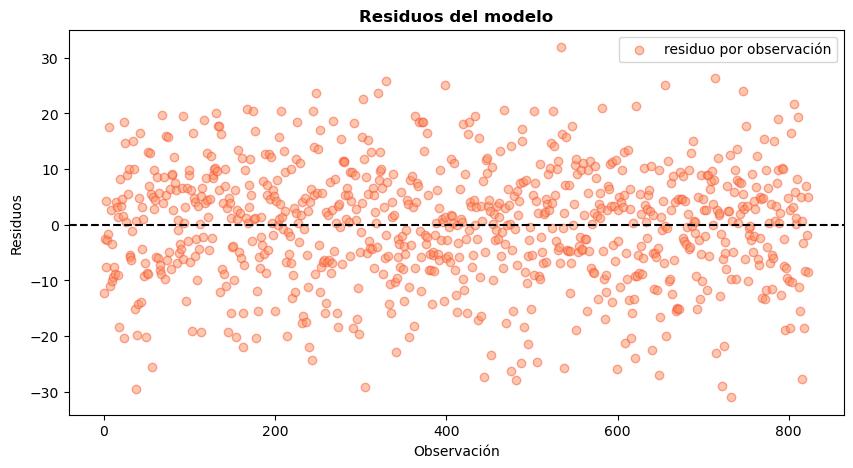

In [25]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.scatter(list(range(len(X_train))),residuo_train,
            color ='#FA9461',
            alpha = 0.5, #Transparencia de los puntos
            edgecolor ='#FA5337',# contorno de los puntos
            label = 'residuo por observación')
plt.axhline(0,color = 'black',linestyle = '--',lw = 1.5)
plt.title('Residuos del modelo',fontsize = 12,fontweight = 'bold')
plt.xlabel('Observación')
plt.ylabel('Residuos')
plt.legend()
plt.show()

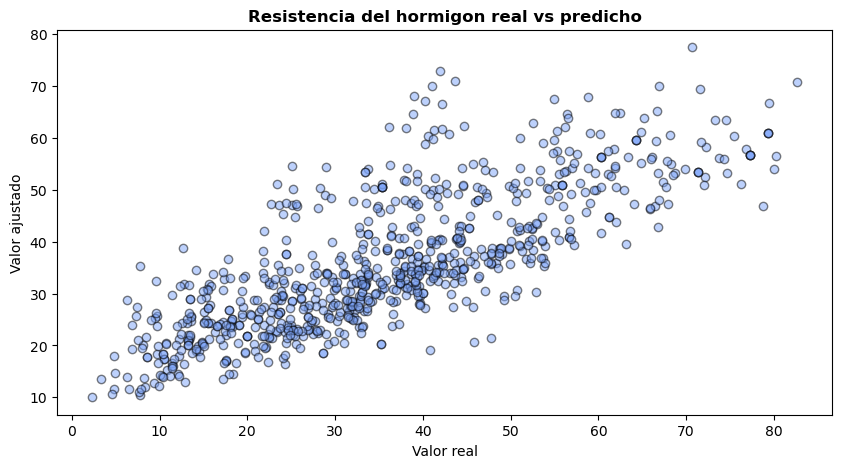

In [26]:
fig , ax = plt.subplots(figsize = (10,5))
ax.scatter(y_train,y_pred_train,color = '#7DA5FA',alpha = 0.5,edgecolor = 'black')
ax.set_title('Resistencia del hormigon real vs predicho',fontsize = 12 , fontweight = 'bold')
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor ajustado')
plt.show()

* *Supuesto 2: Independencia de los residuos*

Se utiliza para detectar la presencia de autocorrelación en los residuos de una regresión . Esta prueba utiliza las siguientes hipótesis:

 * **$H_0$ (hipótesis nula):** No existe correlación entre los residuos.

* **$H_A$ (hipótesis alternativa):** Los residuos están autocorrelacionados.

**A: Verifique esta suposición realizando una prueba de Durbin-Watson .**

El estadístico de prueba es aproximadamente igual a 2 * (1-r) donde r es la autocorrelación muestral de los residuos. Por lo tanto, el estadístico de prueba siempre estará entre 0 y 4 con la siguiente interpretación:

* Una estadística de prueba de 2 indica que no hay correlación serial.
* Cuanto más cerca de 0 estén las estadísticas de la prueba, mayor será la evidencia de correlación serial positiva.
* Cuanto más cerca estén las estadísticas de la prueba de 4 , más evidencia de correlación serial negativa.

* Como regla general, los valores estadísticos de prueba entre el rango de **1.5 y 2.5** se consideran normales. Sin embargo, los valores fuera de este rango podrían indicar que la autocorrelación es un problema.

In [27]:
from statsmodels.stats.stattools import durbin_watson

In [28]:
durbin_watson(resids =residuo_train)

2.0254164299571062

**B: Verifique con la prueba de Breusch-Pagan**

**Interpretación:**

Utilizamos una prueba de Breusch-Pagan para verificar la independencia de los errores. La salida es un valor p (p-value).
* Un valor p pequeño (generalmente < 0.05) sugiere una falta de independencia de errores, lo que indicaría una violación de este supuesto.
* Un valor p grande (>= 0.05) es una indicación de independencia de errores.

In [29]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [30]:
_,p_value,_,_ = het_breuschpagan(modelo.resid,modelo.model.exog)
p_value

5.8921939654102424e-24

* *Supuesto 3*: *Homocedasticidad (No heteroscedasticidad) de los residuos.*

La **heteroscedasticidad**  se refiere a la dispersión desigual de los residuos. Específicamente, se refiere al caso donde hay un cambio sistemático en la dispersión de los residuos sobre el rango de valores medidos.

La heterocedasticidad es un problema porque la regresión de mínimos cuadrados ordinarios (OLS) asume que los residuos provienen de una población que tiene  **homocedasticidad**, lo que significa varianza constante.

Cuando la heterocedasticidad está presente en un análisis de regresión, los resultados del análisis se vuelven difíciles de confiar.

**Cómo detectar la heterocedasticidad**

La forma más sencilla de detectar la heteroscedasticidad es con un gráfico de valor ajustado vs residual .

Una vez que ajusta una línea de regresión a un conjunto de datos, puede crear un diagrama de dispersión que muestre los valores ajustados del modelo frente a los residuos de esos valores ajustados.

El gráfico de dispersión a continuación muestra un valor ajustado típico frente a un gráfico residual en el que está presente la heteroscedasticidad.

**Encontrar una forma de "cono" es un signo revelador de heteroscedasticidad.**

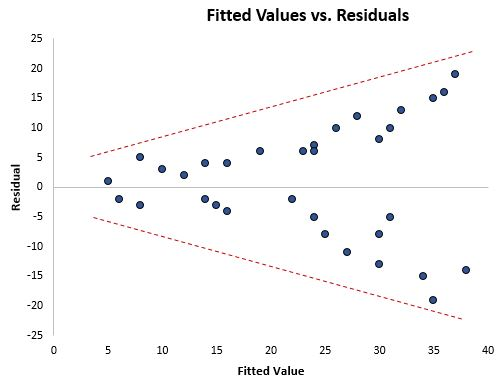

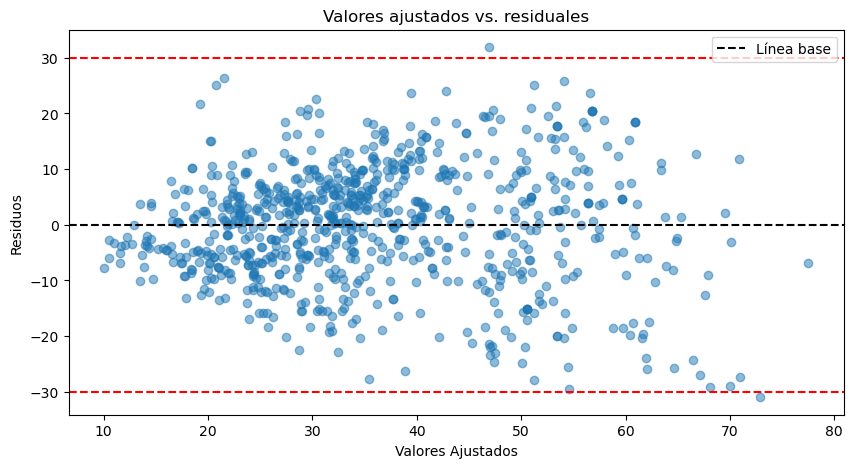

In [31]:
fig , ax = plt.subplots(figsize = (10,5))
ax.scatter(modelo.fittedvalues,modelo.resid,alpha=0.5)
ax.axhline(0,color = 'black',linestyle = '--',label ='Línea base')
ax.axhline(-30,color = 'red',linestyle = '--',)
ax.axhline(30,color = 'red',linestyle = '--',)
ax.set_title('Valores ajustados vs. residuales')
ax.set_xlabel('Valores Ajustados')
ax.set_ylabel('Residuos')
ax.legend()
plt.show()

Verificamos la homocedasticidad visualmente trazando los residuos en función de los valores ajustados. En este gráfico, buscamos una dispersión uniforme de los residuos alrededor de la línea base (línea negra).
Si los residuos se agrupan más en ciertas áreas, indicaría una violación de la homocedasticidad.

Otra forma de determinar si la heterocedasticidad está presente en un análisis de regresión es usar una  prueba de **Breusch-Pagan**.

Una prueba de Breusch-Pagan utiliza las siguientes hipótesis nula y alternativa:

 * **$H_0$ (hipótesis nula):** La homocedasticidad está presente.

* **$H_A$ (hipótesis alternativa):** No  hay homocedasticidad

Si el p-value es menos a 0.05 y  se puede rechazar la hipótesis Nula.

In [32]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 125.34455635524026),
 ('p-value', 5.8921939654102424e-24),
 ('f-value', 20.913876977407114),
 ('f p-value', 5.508457732633742e-26)]

In [33]:
import statsmodels.stats.diagnostic as smd

In [34]:
breusch_pagan_p = smd.het_breuschpagan(modelo.resid, modelo.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('La relación no es heterocedástica')
else:
    print('La relación es heterocedástica')

5.8921939654102424e-24
La relación es heterocedástica


* *Supuesto 4: Normalidad de los residuos*

Este supuesto asume que los errores siguen una distribucion normal.
Verifique esta suposición visualmente usando un gráfico QQ.

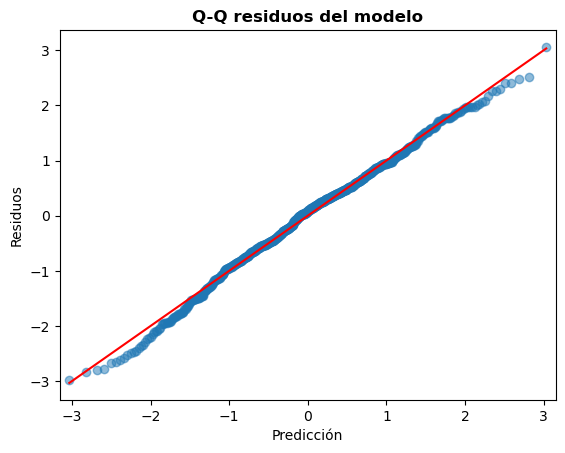

In [59]:
sm.qqplot(
    residuo_train,
     fit = True,
     line = 's',
     color ='firebrick',
     alpha = 0.5,
     lw = 2
)
plt.title('Q-Q residuos del modelo',fontsize = 12,fontweight = 'bold')
plt.xlabel('Predicción')
plt.ylabel('Residuos')
plt.show()

Verificamos la normalidad de los errores utilizando un gráfico Q-Q (Quantile-Quantile). Si los puntos en el gráfico siguen una línea diagonal, es una indicación de que los errores siguen una distribución normal.
En este ejemplo, los residuos siguen aproximadamente una distribución normal.

Verifique esta suposición con pruebas formales como una prueba de Anderson-Darling o Shapiro w.

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: *Shapiro-Wilk test* y *D'Agostino's K-squared test*. Este último es el que incluye el summary de statsmodels bajo el nombre de *Omnibus*.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el *p-value* no es inferior al nivel de referencia *alpha* seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal

In [36]:
from scipy.stats import shapiro, anderson,normaltest

In [37]:
# Normalidad de los residuos Shapiro-Wilk test
# ===================================================================================================
shapiro_test = shapiro(residuo_train)
shapiro_test

ShapiroResult(statistic=0.9950511455535889, pvalue=0.009053823538124561)

In [38]:
if shapiro_test[1] < 0.05:
    print('Los residuos no se distribuye a una normal')
else:
    print('Los residuos se aproxima a una normal.')

Los residuos no se distribuye a una normal


In [39]:
# Normalidad de los residuos Anderson-Darling test
# ================================================================================================================
p_valor, estadistico_critico, niveles_criticos = anderson(residuo_train)
print(f'Estadístico de Anderson-Darling: {estadistico_critico}')
print(f'Niveles críticos: {niveles_criticos}')
print(f'P-valor: {p_valor}')

Estadístico de Anderson-Darling: [0.573 0.653 0.783 0.914 1.087]
Niveles críticos: [15.  10.   5.   2.5  1. ]
P-valor: 1.196566045547911


In [40]:
# Comprobación de normalidad
#==============================================================================================================================
if p_valor < 0.05:
    print('Los residuos no siguen una distribución normal (rechazamos la hipótesis nula de normalidad).')
else:
    print('Los residuos siguen una distribución normal (no hay suficiente evidencia para rechazar la hipótesis nula de normalidad).')

Los residuos siguen una distribución normal (no hay suficiente evidencia para rechazar la hipótesis nula de normalidad).


* *Supuesto 5: Multicolinealidad*

Este supuesto asume que las variables independientes no están altamente correlacionadas entre sí.

La multicolinealidad en el análisis de regresión ocurre cuando dos o más variables explicativas están altamente correlacionadas entre sí, de modo que no brindan información única o independiente en el modelo de regresión.

Si el grado de correlación es lo suficientemente alto entre las variables, puede causar problemas al ajustar e interpretar el modelo de regresión.

Una forma de detectar la multicolinealidad es mediante el uso de una métrica conocida como  factor de inflación de la varianza (VIF) , que mide la correlación y la fuerza de la correlación entre las variables explicativas en un modelo de regresión .

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Variable'] = X_train.columns

In [43]:
vif

,VIF,Variable
0,760.946486,const
1,1.944373,cement
2,1.918640,slag
3,2.355771,flyash
4,2.487315,water
5,2.904488,superplasticizer
6,1.601718,coarseaggregate
7,1.125129,age


* Un valor de 1 indica que no hay correlación entre una variable explicativa dada y cualquier otra variable explicativa en el modelo.
* Un valor entre 1 y 5 indica una correlación moderada entre una variable explicativa dada y otras variables explicativas en el modelo, pero esto a menudo no es lo suficientemente grave como para requerir atención.
* Un valor superior a 5 indica una correlación potencialmente severa entre una variable explicativa dada y otras variables explicativas en el modelo. En este caso, las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables.

* Caundo tenemos pocas variables, podemos explorar la matriz de correlación

In [44]:
correlation_matrix = np.corrcoef(modelo.model.exog,rowvar=False)
correlation_matrix = pd.DataFrame(correlation_matrix).abs()
correlation_matrix = correlation_matrix.drop(labels = 0, axis = 'columns' )
correlation_matrix = correlation_matrix.drop(labels = 0, axis = 'index' )
correlation_matrix


,1,2,3,4,5,6,7
1,1.000000,0.268461,0.384188,0.073814,0.100165,0.114130,0.070737
2,0.268461,1.000000,0.331059,0.073544,0.065016,0.280018,0.041553
3,0.384188,0.331059,1.000000,0.256907,0.374244,0.008512,0.147293
4,0.073814,0.073544,0.256907,1.000000,0.653655,0.188749,0.303328
5,0.100165,0.065016,0.374244,0.653655,1.000000,0.268497,0.191654
6,0.114130,0.280018,0.008512,0.188749,0.268497,1.000000,0.015215
7,0.070737,0.041553,0.147293,0.303328,0.191654,0.015215,1.000000


Verificamos la multicolinealidad examinando la matriz de correlación entre las variables independientes. Valores altos de correlación (cercanos a 1 o -1) indicarían una violación de este supuesto.

## **1.6 Funciones de error para regresión**

### **1.6.1 MAE (Error Absoluto Medio)**

<img src="https://miro.medium.com/v2/format:webp/0*zX9jlpZ8k0CuEpFE.jpg" width = 500>


`MAE` es la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo. En aplicaciones donde la precisión es crucial, `MAE` se prefiere ya que los errores absolutos son más significativos. Pequeñas diferencias pueden tener un gran impacto en la calidad del producto.
* **Ventajas**:
  * Cuando deseas una métrica fácil de interpretar y explicar. **El `MAE` se expresa en las mismas unidades que la variable objetivo**
  * Es más robusto ante los valores atípicos y no penaliza los errores tanto como el `MSE`
  * Cuando los errores pequeños y grandes deben tratarse de manera similar.
* **Desventajas**:
  * No penaliza los errores grandes, lo que podría llevar a subestimar su impacto.
  * No es adecuado para aplicaciones en las que desea prestar más atención a los valores atípicos.

* **Ejemplo de Uso**:
1. **Predicción de Tiempo de Entrega**: Imagina que estás construyendo un modelo para predecir la duración de viajes en un servicio de transporte público. Si cometes un error de 5 minutos en una predicción, esto es igual de problemático, ya sea que el viaje sea de 20 minutos o de 60 minutos.

2. **Predicción de Demanda de Energía Eléctrica**: Una compañía de servicios públicos necesita predecir la demanda de energía eléctrica para garantizar un suministro confiable. Los errores en las predicciones pueden generar problemas operativos y de costo. Si el `MAE` es de 50 MWh, significa que, en promedio, las predicciones se desvían en 50 MWh de la demanda real, lo que es crucial para planificar la generación y la distribución de energía.
3. **Evaluación de Precisión de Balanzas de Cocina**: Una empresa que fabrica balanzas de cocina desea garantizar que sus productos sean precisos en la medición de alimentos e ingredientes. Si el `MAE` es de 1 gramo, esto significa que, en promedio, las mediciones se desvían en 1 gramo del peso real, lo que es esencial para garantizar que los clientes tengan resultados confiables.

In [106]:
MAE = (np.sum(np.abs((y_train - y_pred_train))))/len(X_train)
MAE

8.289332101102097

### **1.6.2 MSE(Error Cuadrático Medio)**

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*aTUPK_ILg7-n0znw.jpg" width = 400>

`MSE` o error cuadrático medio es una de las métricas preferidas para las tareas de regresión. Es simplemente el promedio de la diferencia al cuadrado entre el valor objetivo y el valor predicho por el modelo de regresión. Al cuadrar las diferencias, penaliza incluso un pequeño error que lleva a una sobreestimación de lo malo que es el modelo. Se prefiere más que otras métricas porque es diferenciable y, por lo tanto, se puede optimizar mejor.

* **Ventajas:**
  * Cuando deseas penalizar más los errores grandes.
En algoritmos de optimización que minimizan el MSE.
* **Desventajas**:
  * La unidad de medida no es intuitiva debido al cuadrado. Es decir, la unidad de medida del `MSE` es el cuadrado de la unidad de la variable objetivo, lo que dificulta la interpretación. En otras palabras, no proporciona una métrica directamente interpretable, ya que está en la misma escala que el cuadrado de la variable objetivo (p. ej., dólares al cuadrado). Esto puede hacer que los resultados sean difíciles de comunicar.

* **Ejemplo de Uso**:
1. **Modelado Financiero de Riesgos**: En el ámbito financiero, especialmente en la valoración de riesgos, el `MSE` se utiliza comúnmente. Las pérdidas pueden aumentar significativamente debido a errores cuadráticos, lo que convierte al `MSE` en una métrica más adecuada
2. **Control de Calidad en la Fabricación de Componentes Electrónicos**: Una empresa necesita garantizar que los componentes producidos se ajusten a especificaciones muy estrictas. Aquí, los errores pequeños son significativos y deben minimizarse para mantener la calidad. Se miden dimensiones críticas de componentes electrónicos, y el `MSE` se utiliza para evaluar la precisión del proceso de fabricación. Si el `MSE` es 0.0001 unidades cuadradas, esto significa que, en promedio, las mediciones se desvían en 0.0001 unidades cuadradas de las especificaciones.
3. **Modelado de Predicción de Ingresos**: Una empresa de pronóstico de ingresos desarrolla un modelo para predecir los ingresos de una tienda minorista. Aquí, los errores pequeños pueden ser tolerables, pero los errores grandes pueden afectar las decisiones financieras.Si el `MSE` es de 10,000 dólares al cuadrado, esto significa que, en promedio, las predicciones se desvían en 10,000 dólares al cuadrado de los ingresos reales, lo que tiene implicaciones financieras.

In [111]:
# MSE (ERROR CUADRATICO MEDIO)
# ======================================================================================================================
MSE = np.sum((y_train - y_pred_train)**2)/len(X_train)
MSE

108.6026949832677

### **1.6.3 RMSE(Raíz del Error Cuadrático Medio)**

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*TO7BkvQwtnvVzkK4.png" width = 400>

`RMSE` es la métrica más utilizada para tareas de regresión y es la raíz cuadrada de la diferencia cuadrática promedio entre el valor objetivo y el valor predicho por el modelo. En algunos casos se prefiere más porque los errores primero se elevan al cuadrado antes de promediar, lo que plantea una penalización alta en errores grandes. Esto implica que `RMSE` es útil cuando no se desean errores grandes.
* **Ventajas**:
  *  `RMSE` se utiliza para proporcionar una métrica en la misma unidad que la variable objetivo (p. ej., dólares), lo que la hace más interpretable para los propietarios y compradores. Esto facilita la comunicación de la precisión del modelo.
  * Penalización de Errores Grandes: Al igual que el `MSE`, penaliza los errores grandes.¨
* **Desventajas**:
  * Sensibilidad a Outliers: `RMSE` sigue siendo sensible a valores extremos debido a la operación de elevar al cuadrado.
  * A menudo, penaliza más los errores grandes en comparación con `MSE`, lo que puede ser una desventaja si los errores grandes son aceptables en ciertas situaciones.

* **Ejemplo de Uso**:
  1. Supongamos que estás construyendo un modelo para predecir la puntuación en un examen. Aquí, deseas medir la precisión en la misma unidad que la variable objetivo y penalizar los errores grandes de manera adecuada.
  2. `RMSE` se prefiere en meteorología para medir el error en la misma escala que la precipitación (p. ej., mm). Esto facilita la interpretación de la precisión del modelo.


In [116]:
# RMSE (RAÍZ DEL ERROR CUADRATICO MEDIO)
# ======================================================================================================================
RMSE = np.sqrt(np.sum((y_train - y_pred_train)**2)/(len(y_train)))
RMSE

10.42126167905152

### **1.6.4 MAPE(Mean Absolute Percentage Error**

<img src="https://i.imgur.com/YYMpqUY.jpeg" width = 500>

Es una métrica utilizada para evaluar la precisión de los modelos de pronóstico o regresión, especialmente en situaciones donde las observaciones tienen diferentes escalas o magnitudes. Se expresa como un porcentaje y mide el error promedio en términos de porcentaje de las observaciones reales. La fórmula general para MAPE es la siguiente:

Representa el promedio de los errores porcentuales absolutos. Mide el error como un porcentaje del valor real. Es útil cuando deseas comprender el error relativo a la magnitud de los valores reales.

* **Ventajas**
  * Interpretación Intuitiva: MAPE se expresa en porcentaje, lo que lo hace fácil de entender y comunicar. Un MAPE del 5% significa que, en promedio, las predicciones tienen un error del 5% con respecto a los valores reales.
  * Robusto a Outliers: MAPE no se ve afectado significativamente por valores atípicos o outliers, ya que se calcula como un promedio de porcentajes absolutos.
* **Desventajas**
  * Sensibilidad a Valores Pequeños: MAPE puede ser sensible a valores pequeños o cercanos a cero en el denominador (Valor Real). Cuando los valores reales son bajos, incluso pequeñas diferencias entre los valores reales y pronosticados pueden dar como resultado un MAPE alto.

  * Asimetría: MAPE no penaliza de la misma manera los errores de sobreestimación y subestimación. Los errores de subestimación tienden a tener un impacto más significativo en el MAPE, lo que puede llevar a una interpretación sesgada.

* **Ejemplo de Uso**:
1. Ventas Minoristas: Supongamos que estamos pronosticando las ventas diarias en una tienda minorista. En este caso, MAPE es adecuado porque permite evaluar con precisión el error porcentual promedio en las ventas diarias, lo que es importante para la gestión de inventario y la planificación de personal.
2. Predicción de Demanda de Energía: Si estamos pronosticando la demanda de energía eléctrica en una ciudad, MAPE es útil. La interpretación en porcentaje permite a las autoridades y las empresas de servicios públicos comprender la precisión de las predicciones en términos de la demanda de energía, lo que es fundamental para la gestión de la infraestructura energética.
3. Pronóstico de Ventas en Línea: Para un comercio electrónico que pronostica las ventas en línea, MAPE es una métrica efectiva. Permite medir cuánto se desvían las predicciones de las ventas reales y proporciona información sobre la calidad de los pronósticos, lo que es vital para la toma de decisiones y la gestión de inventario.


In [126]:
# MAPE (Mean Absolute Percentage Error)
# ==================================================================================================================================================
MAPE = (np.sum(np.abs((y_train - y_pred_train)/y_train))/len(y_train))*100
print(f'MAPE(Mean Absolute Percentage Error) = {round(MAPE,2)}%')

MAPE(Mean Absolute Percentage Error) = 32.06%
